# A Study on Mean Values and Graphics

In [ ]:
import icrawler
help(icrawler.builtin)

from icrawler.builtin import GoogleImageCrawler
google_crawler = GoogleImageCrawler(parser_threads=2, downloader_threads=4,
                                    storage={'root_dir': 'crawler2'})
google_crawler.crawl(keyword='vintage postcard women', max_num=100,
                     date_min=None, date_max=None,
                     min_size=(277,277), max_size=None)


%reset

In [2]:
!ls greedy/000027.jpg

greedy/000027.jpg


In [80]:
import cv2
import numpy as np
img = cv2.imread("greedy/000027.jpg")

cv2.imwrite('junk/hue.png', img[:,:,0])
cv2.imwrite('junk/sat.png', img[:,:,1])
cv2.imwrite('junk/val.png', img[:,:,2])

im0 = cv2.imread('junk/hue.png')
im1 = cv2.imread('junk/sat.png')
im2 = cv2.imread('junk/val.png')

cv2.imshow('hue',im0)
cv2.imshow('sat',im1)
cv2.imshow('val',im2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [98]:
import cv2
import numpy as np
img = cv2.imread("greedy/000027.jpg")
# define ROI of RGB image 'img'
r=0
h=133
c=0
w=241
roi = img[r:r+h, c:c+w]
#roi = img[r1:r2, c1:c2]
#convert it into HSV
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
cv2.imwrite("greedy/hsv027.jpg", hsv)
!showme greedy/hsv027.jpg

True

In [99]:
!showme greedy/hsv027.jpg

In [7]:
import cv2
import numpy as np
img = cv2.imread("greedy/000027.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#print hsv

# REFERENCE A -Super-Good-mouse-sizing-and-cropping.ipynb

## Get the height, width and channels with cv2

In [12]:
import numpy as np
import cv2
img = cv2.imread("greedy/000027.jpg")
height, width, channels = img.shape
print height, width, channels

350 438 3


## Select ROI co-ordinates or image to get a mean of the required area

### Color or grayscale for masks

In [15]:
import cv2

from time import time
boxes = []
def on_mouse(event, x, y, flags, params):
    # global img
    t = time()

    if event == cv2.EVENT_LBUTTONDOWN:
        print 'Start Mouse Position: '+str(x)+', '+str(y)
        sbox = [x, y]
        boxes.append(sbox)
        # print count
        # print sbox

    elif event == cv2.EVENT_LBUTTONUP:
        print 'End Mouse Position: '+str(x)+', '+str(y)
        ebox = [x, y]
        boxes.append(ebox)
        print boxes
        crop = img[boxes[-2][1]:boxes[-1][1],boxes[-2][0]:boxes[-1][0]]

        cv2.imshow('crop',crop)
        k =  cv2.waitKey(0)
        if ord('r')== k:
            cv2.imwrite('Crop'+str(t)+'.jpg',crop)
            print "Written to file"

count = 0
while(1):
        count += 1
        # read as a grayscale use for masking
        #img = cv2.imread("greedy/000027.jpg",0)
        
        #use for a color mean
        img = cv2.imread("greedy/000027.jpg")
        
        # img = cv2.blur(img, (3,3))
        #img = cv2.resize(img, None, fx = 0.25,fy = 0.25)

        cv2.namedWindow('real image')
        cv2.setMouseCallback('real image', on_mouse, 0)
        cv2.imshow('real image', img)
        if count < 50:
            if cv2.waitKey(33) == 27:
                cv2.destroyAllWindows()
                break
        elif count >= 50:
            if cv2.waitKey(0) == 27:
                cv2.destroyAllWindows()
                break

Start Mouse Position: 139, 33
End Mouse Position: 335, 241
[[139, 33], [335, 241]]


In [ ]:
# ( COLOR IMAGE ) Select and crop ROI to get a mean of that area

In [4]:
#https://www.learnopencv.com/how-to-select-a-bounding-box-roi-in-opencv-cpp-python/
import cv2
import numpy as np
if __name__ == '__main__' :
    # Read image
    im = cv2.imread("greedy/000027.jpg")
    # Select ROI
    r = cv2.selectROI(im)
    # Crop image
    imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
 
    # Display cropped image
    cv2.imshow("Image", imCrop)
    cv2.waitKey(0)
    
k = cv2.waitKey(33) == ord('a')
if k == 27:
    cv2.destroyAllWindows()    

In [ ]:
139, 33
End Mouse Position: 335, 241

In [13]:
 import cv2
image = cv2.imread("greedy/000027.jpg")
image.shape

(350, 438, 3)

In [14]:
raw = image.flatten()
raw.shape

(459900,)

In [15]:
raw

array([81, 97, 96, ..., 18, 76, 71], dtype=uint8)

In [16]:
raw.shape

(459900,)

In [17]:
means = cv2.mean(image)
means

(57.90804957599478, 139.5147684279191, 141.32708414872798, 0.0)

In [18]:
means = means[:3]
means

(57.90804957599478, 139.5147684279191, 141.32708414872798)

In [19]:
(means, stds) = cv2.meanStdDev(image)
means, stds

(array([[  57.90804958],
        [ 139.51476843],
        [ 141.32708415]]), array([[ 33.9350573 ],
        [ 64.150186  ],
        [ 57.71780606]]))

In [20]:
import numpy as np
stats = np.concatenate([means, stds]).flatten()
stats

array([  57.90804958,  139.51476843,  141.32708415,   33.9350573 ,
         64.150186  ,   57.71780606])

In [25]:
a=stats[1]
b=stats[1]
c=stats[1]
print a,b,c

139.514768428 139.514768428 139.514768428


In [27]:
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
hist.shape

(8, 8, 8)

In [28]:
hist = hist.flatten()
hist.shape

(512,)

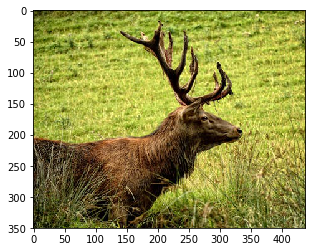

In [31]:
from scipy import misc
import skimage 

f = skimage.io.imread("greedy/000027.jpg")
misc.imsave('greedy/000027-io.jpg', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [45]:
from scipy import misc
import skimage 
ff = skimage.io.imread("greedy/000027.jpg")
misc.imsave('greedy/000027.png', ff) # First we need to create the PNG file

elk = misc.imread('greedy/000027.jpg')
type(elk)      


numpy.ndarray

In [46]:
elk.shape, elk.dtype

((350, 438, 3), dtype('uint8'))

In [47]:
elk.tofile('junk/elk.raw') # Create raw file
elk_from_raw = np.fromfile('junk/elk.raw', dtype=np.uint8)
elk_from_raw.shape

(459900,)

In [49]:
elk_from_raw.shape = (350, 438, 3)
elk_memmap = np.memmap('junk/elk.raw', dtype=np.uint8, shape=(350, 438, 3))

In [50]:
for i in range(10):
    im = np.random.random_integers(0, 255, 10000).reshape((100, 100))
    misc.imsave('junk/random_%02d.png' % i, im)
from glob import glob
filelist = glob('junk/random*.png')
filelist.sort()

/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  from ipykernel import kernelapp as app


In [51]:
print filelist

['junk/random_00.png', 'junk/random_01.png', 'junk/random_02.png', 'junk/random_03.png', 'junk/random_04.png', 'junk/random_05.png', 'junk/random_06.png', 'junk/random_07.png', 'junk/random_08.png', 'junk/random_09.png']


In [68]:
from scipy import misc
import skimage 
ff = skimage.io.imread("greedy/000027.jpg")
import base64
encoded = base64.b64encode(open("greedy/000027.jpg", "rb").read())
#   '/home/jack/anaconda2/lib/python2.7/site-packages/scipy/misc/elk.dat'
output_file = open('/home/jack/anaconda2/lib/python2.7/site-packages/scipy/misc/elk', 'w')
output_file.write(encoded)
output_file.close()

In [78]:
#create a gradient filter
from scipy.misc import imsave
x = np.zeros((640, 640))
x = np.zeros((640, 640), dtype=np.uint8)
x[:] = np.arange(640)
imsave('junk/gradient.png', x)


In [79]:
!showme junk/gradient.png

In [58]:
import scipy
help(scipy.io)

Help on package scipy.io in scipy:

NAME
    scipy.io

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/scipy/io/__init__.py

DESCRIPTION
    Input and output (:mod:`scipy.io`)
    
    .. currentmodule:: scipy.io
    
    SciPy has many modules, classes, and functions available to read data
    from and write data to a variety of file formats.
    
    .. seealso:: :ref:`numpy-reference.routines.io` (in Numpy)
    
    MATLAB® files
    
    .. autosummary::
       :toctree: generated/
    
       loadmat - Read a MATLAB style mat file (version 4 through 7.1)
       savemat - Write a MATLAB style mat file (version 4 through 7.1)
       whosmat - List contents of a MATLAB style mat file (version 4 through 7.1)
    
    IDL® files
    
    .. autosummary::
       :toctree: generated/
    
       readsav - Read an IDL 'save' file
    
    Matrix Market files
    
    .. autosummary::
       :toctree: generated/
    
       mminfo - Query matrix info from Matrix Market formatted 

In [54]:
!locate misc/face


/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/scipy/misc/face.dat
/home/jack/anaconda2/lib/python2.7/site-packages/scipy/misc/face.dat
/home/jack/anaconda2/pkgs/scipy-0.18.1-np111py27_1/lib/python2.7/site-packages/scipy/misc/face.dat
/home/jack/anaconda2/pkgs/scipy-0.19.0-np112py27_0/lib/python2.7/site-packages/scipy/misc/face.dat
/home/jack/anaconda2/pkgs/scipy-0.19.0-np112py35_0/lib/python3.5/site-packages/scipy/misc/face.dat
/home/jack/anaconda2/pkgs/scipy-0.19.1-np112py27_0/lib/python2.7/site-packages/scipy/misc/face.dat
/home/jack/anaconda2/pkgs/scipy-0.19.1-np112py36_0/lib/python3.6/site-packages/scipy/misc/face.dat
/home/jack/python3-starter/SALOME/BINARIES-UB16.04/scipy/lib/python2.7/site-packages/scipy/misc/face.dat
/usr/lib/python2.7/dist-packages/scipy/misc/face.dat
/usr/lib/python3/dist-packages/scipy/misc/face.dat
/usr/local/lib/python2.7/dist-packages/scipy/misc/face.dat


In [75]:
rm /home/jack/anaconda2/lib/python2.7/site-packages/scipy/misc/elk.dat

In [9]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('greedy/000027.jpg'))
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

In [ ]:
import numpy as np

def centeredCrop(img, new_height, new_width):
    width =  np.size(img,1)
    height =  np.size(img,0)

    left = np.ceil((width - new_width)/2.)
    top = np.ceil((height - new_height)/2.)
    right = np.floor((width + new_width)/2.)
    bottom = np.floor((height + new_height)/2.)
    cImg = img[top:bottom, left:right]
    return cImg

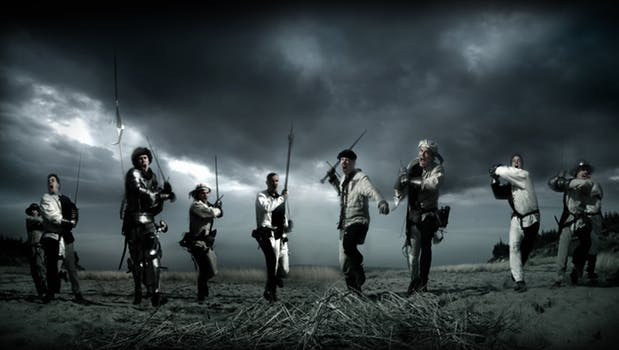

In [64]:
from PIL import Image
img = Image.open("greedy/000676.jpg")
img

# Crop from Center

In [126]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [139]:
import Center_Cut
help(Center_Cut.Centercut)

Help on function Centercut in module Center_Cut:

Centercut(path, img1, new_width, new_height)



In [176]:
#Works with a single image 
from PIL import Image
img = Image.open("greedy/000676.jpg")

new_width=350
new_height=350
w_var=new_width/2
h_var=new_height/2
half_the_width = img.size[0] / 2
half_the_height = img.size[1] / 2
img4 = img.crop(
    (
        half_the_width - w_var,
        half_the_height - h_var,
        half_the_width + w_var,
        half_the_height + h_var
    )
)
img4.save("junk/imgcrop4.jpg")

In [69]:
!showme junk/imgcrop4.jpg

^C


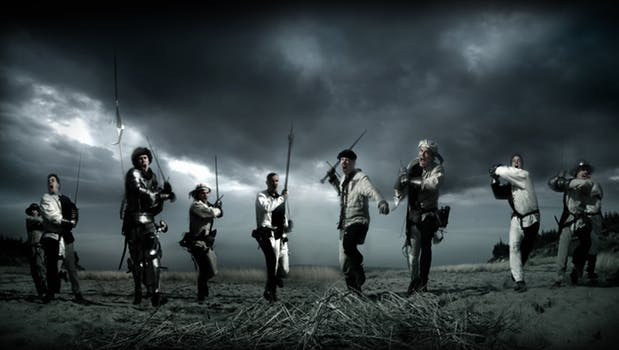

In [63]:
from PIL import Image
im = Image.open("greedy/000676.jpg")
width, height = im.size   # Get dimensions
new_width = 350
new_height = 350
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

im.crop((left, top, right, bottom))
im















In [61]:
from PIL import Image
im = Image.open("greedy/000676.jpg")
width, height = im.size
cw=width/2
ch=height/2
im = Image.crop(())
print cw,ch

309 175


In [60]:
from PIL import Image
import os

def centeredCrop(img, new_height, new_width):
    if __name__ == '__main__' :
        directory='greedy/'
        for filename in os.listdir(directory):
            if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
                print(os.path.join(directory, filename))
                img = Image.open(directory+filename)
                centeredCrop(img, 350, 350)
                print directory+filename," :",img.size

                width =  np.size(img,1)
                height =  np.size(img,0)
                left = np.ceil((width - new_width)/2.)
                top = np.ceil((height - new_height)/2.)
                right = np.floor((width + new_width)/2.)
                bottom = np.floor((height + new_height)/2.)
                cImg = img[top:bottom, left:right]
                cImg.save("junk/filename")
                directory='greedy/'
                #for filename in os.listdir(directory):
                #    if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
                #print(os.path.join(directory, filename))

            #continue
        #else:
            #continue                
        
    #return cImg 



In [42]:
from PIL import Image
import os






def centeredCrop(img, new_height, new_width):
    width =  np.size(img,1)
    height =  np.size(img,0)
    left = np.ceil((width - new_width)/2.)
    top = np.ceil((height - new_height)/2.)
    right = np.floor((width + new_width)/2.)
    bottom = np.floor((height + new_height)/2.)
    cImg = img[top:bottom, left:right]
    directory='greedy/'
    for filename in os.listdir(directory):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
            #print(os.path.join(directory, filename))
            img = Image.open(directory+filename)
            print directory+filename," :",img.size

            continue
        else:
            continue
    return cImg 


greedy/000548.jpeg  : (526, 350)
greedy/000205.jpeg  : (467, 350)
greedy/000708.jpeg  : (525, 350)
greedy/000672.jpeg  : (582, 350)
greedy/000183.jpeg  : (523, 350)
greedy/000689.jpg  : (524, 350)
greedy/000729.jpeg  : (527, 350)
greedy/000475.jpeg  : (525, 350)
greedy/000244.jpg  : (525, 350)
greedy/000066.jpeg  : (548, 350)
greedy/000123.jpeg  : (544, 350)
greedy/000965.jpeg  : (525, 350)
greedy/000474.jpeg  : (527, 350)
greedy/000099.jpeg  : (350, 350)
greedy/000944.jpeg  : (525, 350)
greedy/000892.jpeg  : (622, 350)
greedy/000579.jpeg  : (655, 350)
greedy/000636.jpeg  : (525, 350)
greedy/000286.jpeg  : (524, 350)
greedy/000087.jpeg  : (525, 350)
greedy/000251.jpeg  : (525, 350)
greedy/000100.jpeg  : (525, 350)
greedy/000149.jpeg  : (507, 350)
greedy/000264.jpeg  : (525, 350)
greedy/000822.jpeg  : (425, 350)
greedy/000361.jpg  : (526, 350)
greedy/000696.jpeg  : (525, 350)
greedy/000275.jpeg  : (525, 350)
greedy/000107.jpg  : (524, 350)
greedy/000554.jpeg  : (525, 350)
greedy/000173.

greedy/000096.jpeg  : (515, 350)
greedy/000832.jpeg  : (557, 350)
greedy/000461.jpeg  : (520, 350)
greedy/000771.jpeg  : (525, 350)
greedy/000838.jpeg  : (622, 350)
greedy/000231.jpeg  : (622, 350)
greedy/000794.jpeg  : (524, 350)
greedy/000552.jpeg  : (709, 350)
greedy/000380.jpeg  : (525, 350)
greedy/000939.jpeg  : (525, 350)
greedy/000347.jpeg  : (467, 350)
greedy/000134.jpeg  : (526, 350)
greedy/000439.jpg  : (488, 350)
greedy/000597.jpeg  : (460, 350)
greedy/000317.jpeg  : (467, 350)
greedy/000784.jpeg  : (350, 350)
greedy/000125.jpeg  : (525, 350)
greedy/000233.jpeg  : (622, 350)
greedy/000403.jpeg  : (525, 350)
greedy/000926.jpg  : (525, 350)
greedy/000485.jpeg  : (622, 350)
greedy/000751.jpeg  : (563, 350)
greedy/000118.jpeg  : (525, 350)
greedy/000471.jpeg  : (467, 350)
greedy/000783.jpeg  : (622, 350)
greedy/000515.jpg  : (525, 350)
greedy/000945.jpg  : (525, 350)
greedy/000198.jpeg  : (525, 350)
greedy/000367.jpeg  : (680, 350)
greedy/000412.jpeg  : (623, 350)
greedy/000277.

greedy/000995.jpeg  : (617, 350)
greedy/000884.jpeg  : (526, 350)
greedy/000634.jpeg  : (525, 350)
greedy/000721.jpeg  : (526, 350)
greedy/000415.jpeg  : (525, 350)
greedy/000484.jpeg  : (525, 350)
greedy/000580.jpeg  : (523, 350)
greedy/000035.jpeg  : (525, 350)
greedy/000013.jpeg  : (467, 350)
greedy/000765.jpeg  : (526, 350)
greedy/000760.jpeg  : (525, 350)
greedy/000536.jpeg  : (527, 350)
greedy/000896.jpeg  : (525, 350)
greedy/000383.jpeg  : (426, 350)
greedy/000566.jpeg  : (523, 350)
greedy/000065.jpeg  : (525, 350)
greedy/000657.jpeg  : (524, 350)
greedy/000345.jpeg  : (622, 350)
greedy/000452.jpeg  : (525, 350)
greedy/000422.jpeg  : (525, 350)
greedy/000124.jpeg  : (525, 350)
greedy/000508.jpeg  : (525, 350)
greedy/000115.jpeg  : (526, 350)
greedy/000555.jpeg  : (612, 350)
greedy/000377.jpeg  : (516, 350)
greedy/000394.jpeg  : (528, 350)
greedy/000463.jpeg  : (525, 350)
greedy/000480.jpeg  : (525, 350)
greedy/000741.jpeg  : (467, 350)
greedy/000888.jpeg  : (622, 350)
greedy/000

In [151]:
from PIL import Image
import os
import Center_Cut
new_width=350
new_height=350
path='greedy/'
for filename in os.listdir(path):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
        img = Image.open(path,filename)
              
        Center_Cut.Centercut(path, img, new_width, new_height)
        
        #img1 = "greedy/000676.jpg"
        #Center_Cut,centercut(img, new_width, new_height)
        print directory+filename," :",img.size
        img4.save(filename)
        continue
    else:
        continue
        
        

ValueError: bad mode '000548.jpeg'

In [157]:
from PIL import Image
import os
#import centercut
new_width=350
new_height=350
directory='greedy/'
for filename in os.listdir(directory):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
        img = Image.open(directory+filename)
        #img1 = "greedy/000676.jpg"
        #center_cut(img, new_width, new_height)
        print directory+filename," :",img.size
        #img4.save(filename)
        continue
    else:
        continue
        
        

greedy/000548.jpeg  : (526, 350)
greedy/000205.jpeg  : (467, 350)
greedy/000708.jpeg  : (525, 350)
greedy/000672.jpeg  : (582, 350)
greedy/000183.jpeg  : (523, 350)
greedy/000689.jpg  : (524, 350)
greedy/000729.jpeg  : (527, 350)
greedy/000475.jpeg  : (525, 350)
greedy/000244.jpg  : (525, 350)
greedy/000066.jpeg  : (548, 350)
greedy/000123.jpeg  : (544, 350)
greedy/000965.jpeg  : (525, 350)
greedy/000474.jpeg  : (527, 350)
greedy/000099.jpeg  : (350, 350)
greedy/000944.jpeg  : (525, 350)
greedy/000892.jpeg  : (622, 350)
greedy/000579.jpeg  : (655, 350)
greedy/000636.jpeg  : (525, 350)
greedy/000286.jpeg  : (524, 350)
greedy/000087.jpeg  : (525, 350)
greedy/000251.jpeg  : (525, 350)
greedy/000100.jpeg  : (525, 350)
greedy/000149.jpeg  : (507, 350)
greedy/000264.jpeg  : (525, 350)
greedy/000822.jpeg  : (425, 350)
greedy/000361.jpg  : (526, 350)
greedy/000696.jpeg  : (525, 350)
greedy/000275.jpeg  : (525, 350)
greedy/000107.jpg  : (524, 350)
greedy/000554.jpeg  : (525, 350)
greedy/000173.

greedy/000707.jpeg  : (525, 350)
greedy/000808.jpeg  : (400, 350)
greedy/000097.jpeg  : (525, 350)
greedy/000642.jpeg  : (525, 350)
greedy/000096.jpeg  : (515, 350)
greedy/000832.jpeg  : (557, 350)
greedy/000461.jpeg  : (520, 350)
greedy/000771.jpeg  : (525, 350)
greedy/000838.jpeg  : (622, 350)
greedy/000231.jpeg  : (622, 350)
greedy/000794.jpeg  : (524, 350)
greedy/000552.jpeg  : (709, 350)
greedy/000380.jpeg  : (525, 350)
greedy/000939.jpeg  : (525, 350)
greedy/000347.jpeg  : (467, 350)
greedy/000134.jpeg  : (526, 350)
greedy/000439.jpg  : (488, 350)
greedy/000597.jpeg  : (460, 350)
greedy/000317.jpeg  : (467, 350)
greedy/000784.jpeg  : (350, 350)
greedy/000125.jpeg  : (525, 350)
greedy/000233.jpeg  : (622, 350)
greedy/000403.jpeg  : (525, 350)
greedy/000926.jpg  : (525, 350)
greedy/000485.jpeg  : (622, 350)
greedy/000751.jpeg  : (563, 350)
greedy/000118.jpeg  : (525, 350)
greedy/000471.jpeg  : (467, 350)
greedy/000783.jpeg  : (622, 350)
greedy/000515.jpg  : (525, 350)
greedy/000945

greedy/000786.jpeg  : (523, 350)
greedy/000523.jpeg  : (525, 350)
greedy/000153.jpeg  : (523, 350)
greedy/000621.jpeg  : (467, 350)
greedy/000271.jpeg  : (524, 350)
greedy/000541.jpeg  : (404, 350)
greedy/000557.jpeg  : (525, 350)
greedy/000193.jpeg  : (525, 350)
greedy/000039.jpeg  : (525, 350)
greedy/000370.jpeg  : (525, 350)
greedy/000817.jpeg  : (525, 350)
greedy/000209.jpeg  : (525, 350)
greedy/000500.jpeg  : (525, 350)
greedy/000759.jpeg  : (526, 350)
greedy/000418.jpg  : (628, 350)
greedy/000402.jpeg  : (527, 350)
greedy/000816.jpeg  : (525, 350)
greedy/000284.jpg  : (525, 350)
greedy/000983.jpeg  : (535, 350)
greedy/000460.jpeg  : (467, 350)
greedy/000371.jpeg  : (527, 350)
greedy/000407.jpeg  : (622, 350)
greedy/000773.jpeg  : (593, 350)
greedy/000328.jpeg  : (525, 350)
greedy/000188.jpeg  : (526, 350)
greedy/000539.jpg  : (528, 350)
greedy/000733.jpeg  : (525, 350)
greedy/000973.jpg  : (528, 350)
greedy/000182.jpeg  : (378, 350)
greedy/000663.jpeg  : (525, 350)
greedy/000992.

In [105]:
!ls

000001.jpeg	000360.jpeg  000720.jpeg
000002.jpeg	000361.jpg   000721.jpeg
000003.jpeg	000362.jpeg  000722.jpeg
000004.jpeg	000363.jpeg  000723.jpeg
000005.jpeg	000364.jpeg  000724.jpeg
000006.jpeg	000365.jpg   000725.jpeg
000008.jpeg	000366.jpeg  000726.jpeg
000009.jpeg	000367.jpeg  000727.jpeg
000010.jpeg	000368.jpeg  000728.jpeg
000011.jpeg	000369.jpg   000729.jpeg
000012.jpeg	000370.jpeg  000730.jpeg
000013.jpeg	000371.jpeg  000731.jpeg
000014.jpeg	000372.jpeg  000732.jpeg
000015.jpeg	000373.jpeg  000733.jpeg
000016.jpeg	000374.jpeg  000734.jpeg
000017.jpeg	000375.jpg   000735.jpeg
000018.jpeg	000376.jpeg  000736.jpeg
000019.jpeg	000377.jpeg  000737.jpeg
000020.jpeg	000378.jpeg  000738.jpeg
000021.jpeg	000379.jpeg  000739.jpeg
000022.jpeg	000380.jpeg  000740.jpeg
000023.jpeg	000381.jpeg  000741.jpeg
000024.jpeg	000382.jpeg  000742.jpeg
000025.jpeg	000383.jpeg  000743.jpeg
000026.jpeg	000384.jpeg  000744.jpeg
000027crop.jpg	000385.jpeg  000745.jpeg
000027-io.jpg	000386.jpeg  000746.j

In [106]:
!showme 000013.jpeg	

In [10]:
import cv2
import numpy as np
img = cv2.imread("greedy/000125.jpg")
# define ROI of RGB image 'img'
col1=10;row1=15;
col2=250;row2=365;
#350, 438
roi = img[row1:row2, col1:col2]
#roi = img[r1:r2, c1:c2]
#convert it into HSV
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
cv2.imwrite("greedy/hsv027.jpg", hsv)
#!showme greedy/hsv027.jpg

g = np.mean(hsv, axis=(0, 1))
print g

[  83.34705224   21.22401741  165.88920398]


In [21]:
print "upper_blue = np.array(",g+30,")";print "lower_blue = np.array(",g-30,")";

upper_blue = np.array( [ 113.34705224   51.22401741  195.88920398] )
lower_blue = np.array( [  53.34705224   -8.77598259  135.88920398] )


In [217]:
import numpy as np
import cv2

# Input image
image = cv2.imread('greedy/000525.jpg')

# Converts to grey for better reulsts
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Converts to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV values
lower_skin = np.array([5,36,53])
upper_skin = np.array([19,120,125])

mask = cv2.inRange(hsv, lower_skin, upper_skin)

mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

# Finds contours
im2, cnts, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draws contours
for c in cnts:
    if cv2.contourArea(c) < 3000:
        continue

    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255, 0), 2)

    ## BEGIN - draw rotated rectangle
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(image,[box],0,(0,191,255),2)
    ## END - draw rotated rectangle

cv2.imwrite('junk/hsv_out.png', image)

True

In [ ]:
!showme junk/hsv_out.png

In [2]:
import cv2
import numpy as np

def callback(x):
    pass

cap = cv2.VideoCapture(0)
cv2.namedWindow('image')
#cap = cv2.imread('greedy/000525.jpg')



ilowH = 0
ihighH = 179

ilowS = 0
ihighS = 255
ilowV = 0
ihighV = 255

# create trackbars for color change
cv2.createTrackbar('lowH','image',ilowH,179,callback)
cv2.createTrackbar('highH','image',ihighH,179,callback)

cv2.createTrackbar('lowS','image',ilowS,255,callback)
cv2.createTrackbar('highS','image',ihighS,255,callback)

cv2.createTrackbar('lowV','image',ilowV,255,callback)
cv2.createTrackbar('highV','image',ihighV,255,callback)



while(1):
    ret, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('hsv', hsv)
    lower_hsv = np.array([ilowH, ilowS, ilowV])
    higher_hsv = np.array([ihighH, ihighS, ihighV])
    mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
    cv2.imshow('mask', mask)
    cv2.imshow('frame', frame)
    #print ilowH, ilowS, ilowV
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break


cv2.destroyAllWindows()
cap.release()

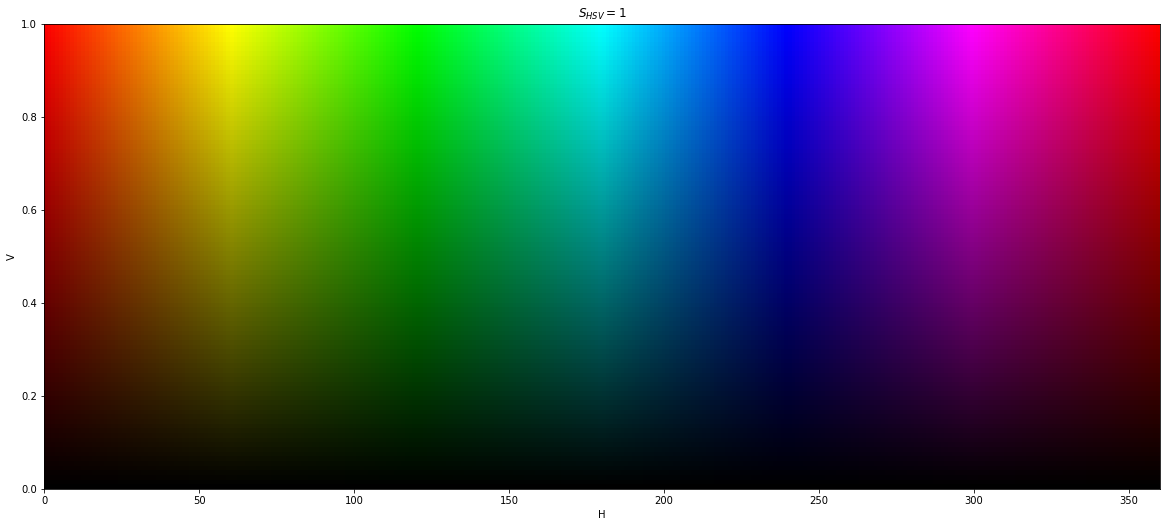

In [203]:
import numpy as np
import pylab as pl
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:300j]
S = np.ones_like(V)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
pl.imshow(RGB, origin="lower", extent=[0, 360, 0, 1], aspect=150)
pl.xlabel("H")
pl.ylabel("V")
pl.title("$S_{HSV}=1$")
pl.show()

In [200]:
import cv2
import numpy as np
img = cv2.imread("greedy/000027.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
upper_blue = np.array( [ 113.34705224,   51.22401741,  195.88920398] )
lower_blue = np.array( [  83.34705224,   21.22401741,  165.88920398] )
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)
cv2.imshow('img',img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
k = cv2.waitKey(0) ==27
if k == 27:
    cv2.destroyAllWindows()

In [177]:
import cv2
import numpy as np
img = cv2.imread("greedy/000027.jpg")
# define ROI of RGB image 'img'
col1=10;row1=225;
col2=250;row2=365;
#350, 438
roi = img[row1:row2, col1:col2]
#roi = img[r1:r2, c1:c2]
#convert it into HSV
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
cv2.imwrite("greedy/hsv027.jpg", hsv)
!showme greedy/hsv027.jpg

In [198]:
import cv2
import numpy as np
img = cv2.imread("greedy/000027.jpg")
# define ROI of RGB image 'img'
x=0;y=0
h=350
w=450
#350, 438
roi = img[x:x+h, y:y+w]
#roi = img[r1:r2, c1:c2]
#convert it into HSV
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
cv2.imwrite("greedy/hsv027.jpg", hsv)
!showme greedy/hsv027.jpg

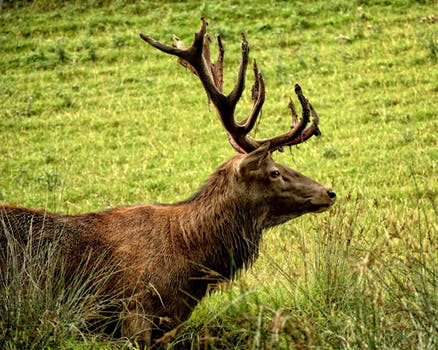

In [112]:
from PIL import Image
im = Image.open("greedy/000027.jpg")
im.size
im

In [42]:
import cv2
import numpy as np
#img = cv2.imread("greedy/000027.jpg")
img = cv2.imread("greedy/000048.jpeg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)





#mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
#res = cv2.bitwise_and(img,img, mask= mask)



cv2.imshow('img',img)
cv2.imshow('hsv',hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# All good from here down 

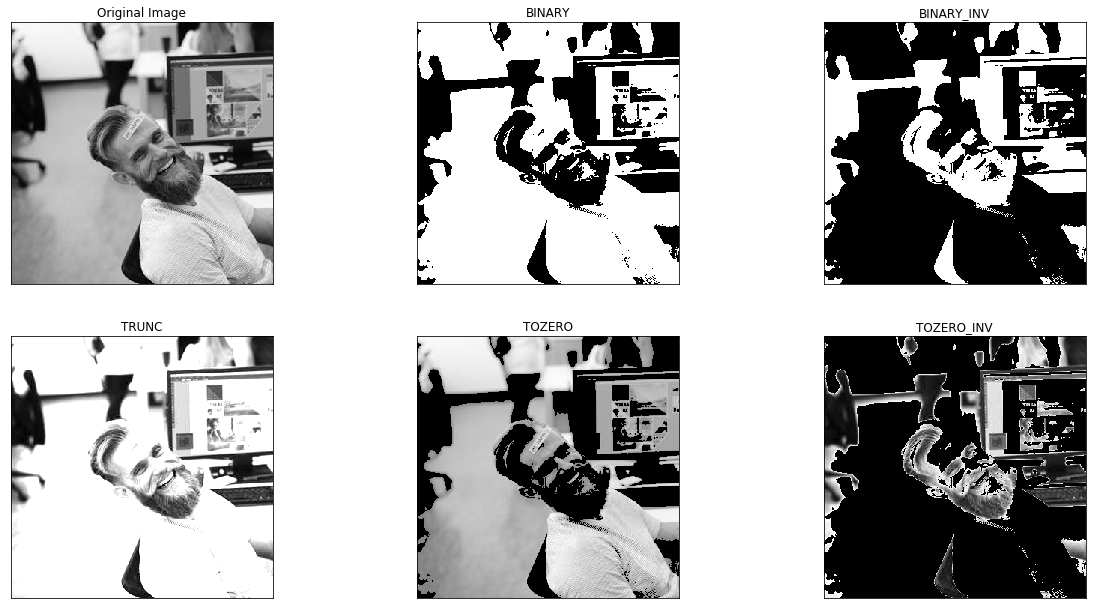

In [196]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] =20, 10
img = cv2.imread('greedy/000200.jpg',0)
#img.imsave('greedy/000125.jpg'. img)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

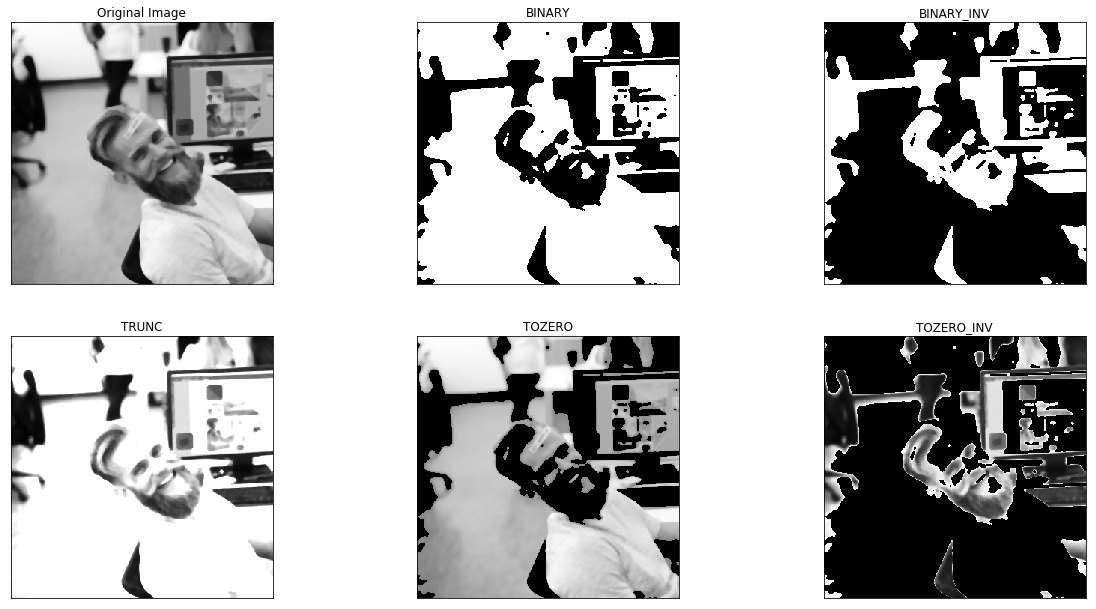

In [197]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
rcParams['figure.figsize'] =20, 10
img = cv2.imread('greedy/000200.jpg',0)
img = cv2.imread('greedy/000200.jpg',0)
img = cv2.medianBlur(img, 5,5)
#img.imsave('greedy/000125.jpg'. img)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()


# Select an are to get a numpy mean for a specific area

In [1]:
import Tkinter
from PIL import Image, ImageTk
from sys import argv

window = Tkinter.Tk(className="bla")

image = Image.open("greedy/000048.jpeg")
canvas = Tkinter.Canvas(window, width=image.size[0], height=image.size[1])
canvas.pack()
image_tk = ImageTk.PhotoImage(image)
canvas.create_image(image.size[0]//2, image.size[1]//2, image=image_tk)

def callback(event):
    #print "[",event.x,"],["+event.y,"]"
    print "[",event.x,",",event.y,"],"
 
canvas.bind("<Button-1>", callback)
Tkinter.mainloop()

[ 112 , 148 ],
[ 129 , 109 ],
[ 154 , 109 ],
[ 160 , 66 ],
[ 169 , 37 ],
[ 181 , 113 ],
[ 189 , 112 ],
[ 201 , 81 ],
[ 211 , 116 ],
[ 261 , 118 ],
[ 271 , 111 ],
[ 281 , 162 ],
[ 290 , 156 ],
[ 300 , 145 ],
[ 317 , 168 ],
[ 343 , 177 ],
[ 343 , 147 ],
[ 350 , 137 ],
[ 348 , 118 ],
[ 357 , 111 ],
[ 373 , 123 ],
[ 373 , 139 ],
[ 380 , 154 ],
[ 374 , 179 ],
[ 370 , 203 ],
[ 357 , 246 ],
[ 340 , 275 ],
[ 304 , 301 ],
[ 293 , 268 ],
[ 266 , 252 ],
[ 244 , 222 ],
[ 215 , 230 ],
[ 177 , 238 ],
[ 143 , 253 ],
[ 134 , 253 ],
[ 124 , 230 ],
[ 113 , 224 ],
[ 117 , 198 ],
[ 117 , 161 ],
[ 108 , 155 ],
[ 130 , 88 ],
[ 120 , 66 ],


# Center_Cut.py working fine 

In [155]:
%%writefile Center_Cut.py
#!/home/jack/anaconda2/bin/python
#Good file
from PIL import Image
def Centercut(path, img1, new_width, new_height):
    img = Image.open(path+"/"+img1)
    w_var=new_width/2
    h_var=new_height/2
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - w_var,
            half_the_height - h_var,
            half_the_width + w_var,
            half_the_height + h_var
        )
    )
    return img4
    #if __name__ == '__main__' :


Overwriting Center_Cut.py


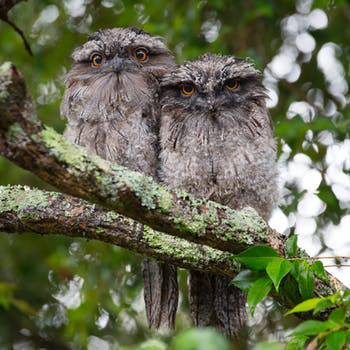

In [154]:
import Center_Cut
new_width=350
new_height=350
path = 'greedy'
img1 = "000647.jpeg"
Center_Cut.Centercut(path, img1, new_width, new_height)


In [ ]:
from PIL import Image
import os
import Center_Cut
new_width=350
new_height=350
path='greedy/'
for filename in os.listdir(path):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"): 
        img1 = Image.open(path+filename)
        #crops allimages in the directory 350x350
        imgS = Center_Cut.Centercut(path, filename, new_width, new_height)
        #print directory+filename," :",img1.size
        imgS.save(filename)
        continue
    else:
        continue
        
        

In [176]:
#Works with a single image 
from PIL import Image
img = Image.open("greedy/000676.jpg")

new_width=350
new_height=350
w_var=new_width/2
h_var=new_height/2
half_the_width = img.size[0] / 2
half_the_height = img.size[1] / 2
img4 = img.crop(
    (
        half_the_width - w_var,
        half_the_height - h_var,
        half_the_width + w_var,
        half_the_height + h_var
    )
)
img4.save("junk/imgcrop4.jpg")

# Center_Cut.py working fine  ---- end Center_Cut.py with test

## https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
# Select an are to get a numpy mean for a specific area

In [1]:
import Tkinter
from PIL import Image, ImageTk
from sys import argv

window = Tkinter.Tk(className="bla")

image = Image.open("greedy/000048.jpeg")
canvas = Tkinter.Canvas(window, width=image.size[0], height=image.size[1])
canvas.pack()
image_tk = ImageTk.PhotoImage(image)
canvas.create_image(image.size[0]//2, image.size[1]//2, image=image_tk)

def callback(event):
    #print "[",event.x,"],["+event.y,"]"
    print "[",event.x,",",event.y,"],"
 
canvas.bind("<Button-1>", callback)
Tkinter.mainloop()

[ 112 , 148 ],
[ 129 , 109 ],
[ 154 , 109 ],
[ 160 , 66 ],
[ 169 , 37 ],
[ 181 , 113 ],
[ 189 , 112 ],
[ 201 , 81 ],
[ 211 , 116 ],
[ 261 , 118 ],
[ 271 , 111 ],
[ 281 , 162 ],
[ 290 , 156 ],
[ 300 , 145 ],
[ 317 , 168 ],
[ 343 , 177 ],
[ 343 , 147 ],
[ 350 , 137 ],
[ 348 , 118 ],
[ 357 , 111 ],
[ 373 , 123 ],
[ 373 , 139 ],
[ 380 , 154 ],
[ 374 , 179 ],
[ 370 , 203 ],
[ 357 , 246 ],
[ 340 , 275 ],
[ 304 , 301 ],
[ 293 , 268 ],
[ 266 , 252 ],
[ 244 , 222 ],
[ 215 , 230 ],
[ 177 , 238 ],
[ 143 , 253 ],
[ 134 , 253 ],
[ 124 , 230 ],
[ 113 , 224 ],
[ 117 , 198 ],
[ 117 , 161 ],
[ 108 , 155 ],
[ 130 , 88 ],
[ 120 , 66 ],


# Shows Image with mouse co-ordinates

In [9]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('greedy/000027.jpg'))
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

# set hsv parameters for a mask

In [5]:
import cv2
import numpy as np
img = cv2.imread("greedy/000048.jpeg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)
cv2.imshow('img',img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
k = cv2.waitKey(0) ==27
if k == 27:

    cv2.destroyAllWindows()

In [ ]:
# %load colorthief.py
"""
    colorthief
    ~~~~~~~~~~

    Grabbing the color palette from an image.

    :copyright: (c) 2015 by Shipeng Feng.
    :license: BSD, see LICENSE for more details.
"""
__version__ = '0.2.1'

import math

from PIL import Image


class cached_property(object):
    """Decorator that creates converts a method with a single
    self argument into a property cached on the instance.
    """
    def __init__(self, func):
        self.func = func

    def __get__(self, instance, type):
        res = instance.__dict__[self.func.__name__] = self.func(instance)
        return res


class ColorThief(object):
    """Color thief main class."""
    def __init__(self, file):
        """Create one color thief for one image.

        :param file: A filename (string) or a file object. The file object
                     must implement `read()`, `seek()`, and `tell()` methods,
                     and be opened in binary mode.
        """
        self.image = Image.open(file)

    def get_color(self, quality=10):
        """Get the dominant color.

        :param quality: quality settings, 1 is the highest quality, the bigger
                        the number, the faster a color will be returned but
                        the greater the likelihood that it will not be the
                        visually most dominant color
        :return tuple: (r, g, b)
        """
        palette = self.get_palette(5, quality)
        return palette[0]

    def get_palette(self, color_count=10, quality=10):
        """Build a color palette.  We are using the median cut algorithm to
        cluster similar colors.

        :param color_count: the size of the palette, max number of colors
        :param quality: quality settings, 1 is the highest quality, the bigger
                        the number, the faster the palette generation, but the
                        greater the likelihood that colors will be missed.
        :return list: a list of tuple in the form (r, g, b)
        """
        image = self.image.convert('RGBA')
        width, height = image.size
        pixels = image.getdata()
        pixel_count = width * height
        valid_pixels = []
        for i in range(0, pixel_count, quality):
            r, g, b, a = pixels[i]
            # If pixel is mostly opaque and not white
            if a >= 125:
                if not (r > 250 and g > 250 and b > 250):
                    valid_pixels.append((r, g, b))

        # Send array to quantize function which clusters values
        # using median cut algorithm
        cmap = MMCQ.quantize(valid_pixels, color_count)
        return cmap.palette


class MMCQ(object):
    """Basic Python port of the MMCQ (modified median cut quantization)
    algorithm from the Leptonica library (http://www.leptonica.com/).
    """

    SIGBITS = 5
    RSHIFT = 8 - SIGBITS
    MAX_ITERATION = 1000
    FRACT_BY_POPULATIONS = 0.75

    @staticmethod
    def get_color_index(r, g, b):
        return (r << (2 * MMCQ.SIGBITS)) + (g << MMCQ.SIGBITS) + b

    @staticmethod
    def get_histo(pixels):
        """histo (1-d array, giving the number of pixels in each quantized
        region of color space)
        """
        histo = dict()
        for pixel in pixels:
            rval = pixel[0] >> MMCQ.RSHIFT
            gval = pixel[1] >> MMCQ.RSHIFT
            bval = pixel[2] >> MMCQ.RSHIFT
            index = MMCQ.get_color_index(rval, gval, bval)
            histo[index] = histo.setdefault(index, 0) + 1
        return histo

    @staticmethod
    def vbox_from_pixels(pixels, histo):
        rmin = 1000000
        rmax = 0
        gmin = 1000000
        gmax = 0
        bmin = 1000000
        bmax = 0
        for pixel in pixels:
            rval = pixel[0] >> MMCQ.RSHIFT
            gval = pixel[1] >> MMCQ.RSHIFT
            bval = pixel[2] >> MMCQ.RSHIFT
            rmin = min(rval, rmin)
            rmax = max(rval, rmax)
            gmin = min(gval, gmin)
            gmax = max(gval, gmax)
            bmin = min(bval, bmin)
            bmax = max(bval, bmax)
        return VBox(rmin, rmax, gmin, gmax, bmin, bmax, histo)

    @staticmethod
    def median_cut_apply(histo, vbox):
        if not vbox.count:
            return (None, None)

        rw = vbox.r2 - vbox.r1 + 1
        gw = vbox.g2 - vbox.g1 + 1
        bw = vbox.b2 - vbox.b1 + 1
        maxw = max([rw, gw, bw])
        # only one pixel, no split
        if vbox.count == 1:
            return (vbox.copy, None)
        # Find the partial sum arrays along the selected axis.
        total = 0
        sum_ = 0
        partialsum = {}
        lookaheadsum = {}
        do_cut_color = None
        if maxw == rw:
            do_cut_color = 'r'
            for i in range(vbox.r1, vbox.r2+1):
                sum_ = 0
                for j in range(vbox.g1, vbox.g2+1):
                    for k in range(vbox.b1, vbox.b2+1):
                        index = MMCQ.get_color_index(i, j, k)
                        sum_ += histo.get(index, 0)
                total += sum_
                partialsum[i] = total
        elif maxw == gw:
            do_cut_color = 'g'
            for i in range(vbox.g1, vbox.g2+1):
                sum_ = 0
                for j in range(vbox.r1, vbox.r2+1):
                    for k in range(vbox.b1, vbox.b2+1):
                        index = MMCQ.get_color_index(j, i, k)
                        sum_ += histo.get(index, 0)
                total += sum_
                partialsum[i] = total
        else:  # maxw == bw
            do_cut_color = 'b'
            for i in range(vbox.b1, vbox.b2+1):
                sum_ = 0
                for j in range(vbox.r1, vbox.r2+1):
                    for k in range(vbox.g1, vbox.g2+1):
                        index = MMCQ.get_color_index(j, k, i)
                        sum_ += histo.get(index, 0)
                total += sum_
                partialsum[i] = total
        for i, d in partialsum.items():
            lookaheadsum[i] = total - d

        # determine the cut planes
        dim1 = do_cut_color + '1'
        dim2 = do_cut_color + '2'
        dim1_val = getattr(vbox, dim1)
        dim2_val = getattr(vbox, dim2)
        for i in range(dim1_val, dim2_val+1):
            if partialsum[i] > (total / 2):
                vbox1 = vbox.copy
                vbox2 = vbox.copy
                left = i - dim1_val
                right = dim2_val - i
                if left <= right:
                    d2 = min([dim2_val - 1, int(i + right / 2)])
                else:
                    d2 = max([dim1_val, int(i - 1 - left / 2)])
                # avoid 0-count boxes
                while not partialsum.get(d2, False):
                    d2 += 1
                count2 = lookaheadsum.get(d2)
                while not count2 and partialsum.get(d2-1, False):
                    d2 -= 1
                    count2 = lookaheadsum.get(d2)
                # set dimensions
                setattr(vbox1, dim2, d2)
                setattr(vbox2, dim1, getattr(vbox1, dim2) + 1)
                return (vbox1, vbox2)
        return (None, None)

    @staticmethod
    def quantize(pixels, max_color):
        """Quantize.

        :param pixels: a list of pixel in the form (r, g, b)
        :param max_color: max number of colors
        """
        if not pixels:
            raise Exception('Empty pixels when quantize.')
        if max_color < 2 or max_color > 256:
            raise Exception('Wrong number of max colors when quantize.')

        histo = MMCQ.get_histo(pixels)

        # check that we aren't below maxcolors already
        if len(histo) <= max_color:
            # generate the new colors from the histo and return
            pass

        # get the beginning vbox from the colors
        vbox = MMCQ.vbox_from_pixels(pixels, histo)
        pq = PQueue(lambda x: x.count)
        pq.push(vbox)

        # inner function to do the iteration
        def iter_(lh, target):
            n_color = 1
            n_iter = 0
            while n_iter < MMCQ.MAX_ITERATION:
                vbox = lh.pop()
                if not vbox.count:  # just put it back
                    lh.push(vbox)
                    n_iter += 1
                    continue
                # do the cut
                vbox1, vbox2 = MMCQ.median_cut_apply(histo, vbox)
                if not vbox1:
                    raise Exception("vbox1 not defined; shouldn't happen!")
                lh.push(vbox1)
                if vbox2:  # vbox2 can be null
                    lh.push(vbox2)
                    n_color += 1
                if n_color >= target:
                    return
                if n_iter > MMCQ.MAX_ITERATION:
                    return
                n_iter += 1

        # first set of colors, sorted by population
        iter_(pq, MMCQ.FRACT_BY_POPULATIONS * max_color)

        # Re-sort by the product of pixel occupancy times the size in
        # color space.
        pq2 = PQueue(lambda x: x.count * x.volume)
        while pq.size():
            pq2.push(pq.pop())

        # next set - generate the median cuts using the (npix * vol) sorting.
        iter_(pq2, max_color - pq2.size())

        # calculate the actual colors
        cmap = CMap()
        while pq2.size():
            cmap.push(pq2.pop())
        return cmap


class VBox(object):
    """3d color space box"""
    def __init__(self, r1, r2, g1, g2, b1, b2, histo):
        self.r1 = r1
        self.r2 = r2
        self.g1 = g1
        self.g2 = g2
        self.b1 = b1
        self.b2 = b2
        self.histo = histo

    @cached_property
    def volume(self):
        sub_r = self.r2 - self.r1
        sub_g = self.g2 - self.g1
        sub_b = self.b2 - self.b1
        return (sub_r + 1) * (sub_g + 1) * (sub_b + 1)

    @property
    def copy(self):
        return VBox(self.r1, self.r2, self.g1, self.g2,
                    self.b1, self.b2, self.histo)

    @cached_property
    def avg(self):
        ntot = 0
        mult = 1 << (8 - MMCQ.SIGBITS)
        r_sum = 0
        g_sum = 0
        b_sum = 0
        for i in range(self.r1, self.r2 + 1):
            for j in range(self.g1, self.g2 + 1):
                for k in range(self.b1, self.b2 + 1):
                    histoindex = MMCQ.get_color_index(i, j, k)
                    hval = self.histo.get(histoindex, 0)
                    ntot += hval
                    r_sum += hval * (i + 0.5) * mult
                    g_sum += hval * (j + 0.5) * mult
                    b_sum += hval * (k + 0.5) * mult

        if ntot:
            r_avg = int(r_sum / ntot)
            g_avg = int(g_sum / ntot)
            b_avg = int(b_sum / ntot)
        else:
            r_avg = int(mult * (self.r1 + self.r2 + 1) / 2)
            g_avg = int(mult * (self.g1 + self.g2 + 1) / 2)
            b_avg = int(mult * (self.b1 + self.b2 + 1) / 2)

        return r_avg, g_avg, b_avg

    def contains(self, pixel):
        rval = pixel[0] >> MMCQ.RSHIFT
        gval = pixel[1] >> MMCQ.RSHIFT
        bval = pixel[2] >> MMCQ.RSHIFT
        return all([
            rval >= self.r1,
            rval <= self.r2,
            gval >= self.g1,
            gval <= self.g2,
            bval >= self.b1,
            bval <= self.b2,
        ])

    @cached_property
    def count(self):
        npix = 0
        for i in range(self.r1, self.r2 + 1):
            for j in range(self.g1, self.g2 + 1):
                for k in range(self.b1, self.b2 + 1):
                    index = MMCQ.get_color_index(i, j, k)
                    npix += self.histo.get(index, 0)
        return npix


class CMap(object):
    """Color map"""
    def __init__(self):
        self.vboxes = PQueue(lambda x: x['vbox'].count * x['vbox'].volume)

    @property
    def palette(self):
        return self.vboxes.map(lambda x: x['color'])

    def push(self, vbox):
        self.vboxes.push({
            'vbox': vbox,
            'color': vbox.avg,
        })

    def size(self):
        return self.vboxes.size()

    def nearest(self, color):
        d1 = None
        p_color = None
        for i in range(self.vboxes.size()):
            vbox = self.vboxes.peek(i)
            d2 = math.sqrt(
                math.pow(color[0] - vbox['color'][0], 2) +
                math.pow(color[1] - vbox['color'][1], 2) +
                math.pow(color[2] - vbox['color'][2], 2)
            )
            if d1 is None or d2 < d1:
                d1 = d2
                p_color = vbox['color']
        return p_color

    def map(self, color):
        for i in range(self.vboxes.size()):
            vbox = self.vboxes.peek(i)
            if vbox['vbox'].contains(color):
                return vbox['color']
        return self.nearest(color)


class PQueue(object):
    """Simple priority queue."""
    def __init__(self, sort_key):
        self.sort_key = sort_key
        self.contents = []
        self._sorted = False

    def sort(self):
        self.contents.sort(key=self.sort_key)
        self._sorted = True

    def push(self, o):
        self.contents.append(o)
        self._sorted = False

    def peek(self, index=None):
        if not self._sorted:
            self.sort()
        if index is None:
            index = len(self.contents) - 1
        return self.contents[index]

    def pop(self):
        if not self._sorted:
            self.sort()
        return self.contents.pop()

    def size(self):
        return len(self.contents)

    def map(self, f):
        return list(map(f, self.contents))


In [111]:
%%writefile ImageEffectsBot.py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image, ImageDraw, ImageFont, ImageChops 
import os
import sys
import markovify
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import time
nap=randint(10,400)
time.sleep(nap)
path = r"AUGpost/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)


def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]
        #textin = (generate_the_word("wordcloud.txt"))


base = Image.open(filename0).convert('RGBA')
 

txt = Image.new('RGBA', base.size, (255,255,255,0))
def generate_the_word(infile):
    with open(infile) as f:
            contents_of_file = f.read()
    lines = contents_of_file.splitlines()
    line_number = random.randrange(0, len(lines))
    return lines[line_number]
    

#base = Image.open('images/NewFolder/lightning01.jpg').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
marginx = 225
marginy = 50
x = width - marginx
y = height - marginy
signature_ = "The TwitterBot Project" 
d.text((x,y), signature_, font=fnt, fill=(0,0,0,256))

out = Image.alpha_composite(base, txt)
out.save("tmp/tmp.jpg", "JPEG")
# save the image then reopen to put a title
base = Image.open('tmp/tmp.jpg').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
x = 90
y = 10
#generate a title
title = (generate_the_word("titles.txt"))
d.text((x,y), "Python Stuff" , font=fnt, fill=(0,0,0,250))
out2 = Image.alpha_composite(base, txt)
out2.save("tmp/TM_POST.jpg", "JPEG")

filenameP = time.strftime("posted/%Y%m%d%H%M%S.jpg")
out2.save(filenameP, "JPEG")
#removed keys for privacy reasons
CONSUMER_KEY = 'xxxxxxx'
CONSUMER_SECRET = 'xxxxxx'
ACCESS_KEY = 'xxxxxxxxx'
ACCESS_SECRET = 'xxxxxxxxxx'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("art.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(140))
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

Overwriting ImageEffectsBot.py


In [106]:
%%writefile titlenpost.py
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
nap = randint(10,35)
time.sleep(nap)
path = r"AUGpost/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_text_with_halo(inp, (15, 8), "Nouveau Stuff", font, text_col, halo_col)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    txt=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST.jpg")

#removed keys for privacy reasons
CONSUMER_KEY = 'xxxxxxxxxxxxxx'
CONSUMER_SECRET = 'xxxxxxxx'
ACCESS_KEY = 'xxxxxxxxxxxx'
ACCESS_SECRET = 'xxxxxxx'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("book2.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(140))
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

Overwriting titlenpost.py


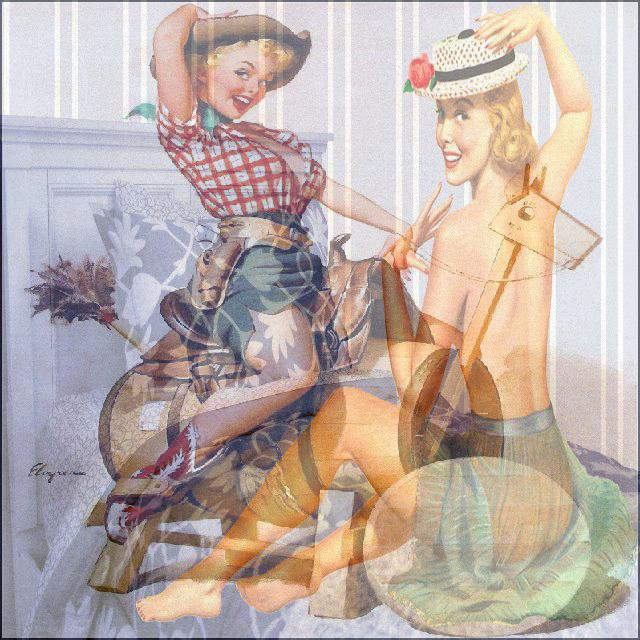

In [20]:
from PIL import Image
from colorthief import ColorThief
imgC = Image.open("aug25/20170825094003.jpg")
imgC

In [22]:
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
print dominant_color

(204, 195, 192)


In [25]:
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
print palette

[(210, 200, 195), (62, 59, 74), (163, 134, 117), (155, 107, 71), (139, 142, 156), (120, 86, 100)]


In [54]:
import string
import re
help(string.translate)

Help on function translate in module string:

translate(s, table, deletions='')
    translate(s,table [,deletions]) -> string
    
    Return a copy of the string s, where all characters occurring
    in the optional argument deletions are removed, and the
    remaining characters have been mapped through the given
    translation table, which must be a string of length 256.  The
    deletions argument is not allowed for Unicode strings.



In [25]:
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
print palette

[(210, 200, 195), (62, 59, 74), (163, 134, 117), (155, 107, 71), (139, 142, 156), (120, 86, 100)]


In [68]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
print name.translate(table,"(){}<>")

210, 200, 195 62, 59, 74 163, 134, 117 155, 107, 71 139, 142, 156 120, 86, 100


In [97]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
print name.translate(table,",(){}<>")

210 200 195 62 59 74 163 134 117 155 107 71 139 142 156 120 86 100


# ----- GOOD ------- GOOD

In [103]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
newT = name.translate(table,",(){}<>")
palette = newT.replace(" ", ",")
print palette

210,200,195,62,59,74,163,134,117,155,107,71,139,142,156,120,86,100


In [103]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
newT = name.translate(table,",(){}<>")
palette = newT.replace(" ", ",")
print palette

210,200,195,62,59,74,163,134,117,155,107,71,139,142,156,120,86,100


In [95]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
string = name.translate(table,",(){}<>")
nt=''.join(s for s in string if ord(s)>31 and ord(s)<126)
palette = nt.replace(" ", ",")
#palette = palette[1:-1]

In [71]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
print str(palette).strip('[]()')


210, 200, 195), (62, 59, 74), (163, 134, 117), (155, 107, 71), (139, 142, 156), (120, 86, 100


In [75]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)


print " ".join(str(x) for x in palette)

(210, 200, 195) (62, 59, 74) (163, 134, 117) (155, 107, 71) (139, 142, 156) (120, 86, 100)


In [40]:
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
palette = palette[1:-1]
print palette

[(62, 59, 74), (163, 134, 117), (155, 107, 71), (139, 142, 156)]


In [37]:
from colorthief import ColorThief
import numpy
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)

numpy.fromstring(palette, dtype=int, sep=",")


TypeError: argument 1 must be string or read-only buffer, not list

In [28]:
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
", ".join(map(str, palette))


'(210, 200, 195), (62, 59, 74), (163, 134, 117), (155, 107, 71), (139, 142, 156), (120, 86, 100)'

In [33]:
import StringIO
import csv
from colorthief import ColorThief
import io
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
line = StringIO.StringIO()
writer = csv.writer(line)
writer.writerow(palette)
csvcontent = line.getvalue()

print csvcontent

"(210, 200, 195)","(62, 59, 74)","(163, 134, 117)","(155, 107, 71)","(139, 142, 156)","(120, 86, 100)"



In [30]:
from colorthief import ColorThief
import io
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)

s = io.StringIO()
print(*palette, file=s, sep=', ', end='')
s.getvalue()







SyntaxError: invalid syntax (<ipython-input-30-016a6e8c2d29>, line 7)

In [26]:
import pandas as pd 
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=6)
df = pd.DataFrame(palette)
print df

     0    1    2
0  210  200  195
1   62   59   74
2  163  134  117
3  155  107   71
4  139  142  156
5  120   86  100


In [ ]:
from colorthief import ColorThief
color_thief = ColorThief('aug25/20170825094003.jpg')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=6)

In [19]:
from PIL import Image
from colorthief import ColorThief
imgC = Image.open("aug25/20170825094003.jpg")
self = ColorThief(imgC)
pal  = ColorThief.get_color(self, quality=10)


AttributeError: 'JpegImageFile' object has no attribute 'read'

In [13]:
from colorthief import ColorThief
help(ColorThief)


Help on class ColorThief in module colorthief:

class ColorThief(__builtin__.object)
 |  Color thief main class.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, file)
 |      Create one color thief for one image.
 |      
 |      :param file: A filename (string) or a file object. The file object
 |                   must implement `read()`, `seek()`, and `tell()` methods,
 |                   and be opened in binary mode.
 |  
 |  get_color(self, quality=10)
 |      Get the dominant color.
 |      
 |      :param quality: quality settings, 1 is the highest quality, the bigger
 |                      the number, the faster a color will be returned but
 |                      the greater the likelihood that it will not be the
 |                      visually most dominant color
 |      :return tuple: (r, g, b)
 |  
 |  get_palette(self, color_count=10, quality=10)
 |      Build a color palette.  We are using the median cut algorithm to
 |      cluster similar colors.
 |      
 |  

In [2]:
!ls color*

colorfulpost  colorful.py  colorific.ipynb

colorful:
20170824124000.jpg  20170824133849.jpg	20170824135539.jpg  20170824175136.jpg
20170824124148.jpg  20170824133852.jpg	20170824135541.jpg  20170824175139.jpg
20170824124150.jpg  20170824133855.jpg	20170824135544.jpg  20170824175142.jpg
20170824124153.jpg  20170824133857.jpg	20170824135547.jpg  20170824175145.jpg
20170824124159.jpg  20170824133900.jpg	20170824135550.jpg  20170824175147.jpg
20170824124201.jpg  20170824133903.jpg	20170824135552.jpg  20170824175150.jpg
20170824124208.jpg  20170824133905.jpg	20170824135555.jpg  20170824175153.jpg
20170824124211.jpg  20170824133908.jpg	20170824135558.jpg  20170824175156.jpg
20170824124216.jpg  20170824133911.jpg	20170824135600.jpg  20170824175159.jpg
20170824124219.jpg  20170824133914.jpg	20170824135603.jpg  20170824175202.jpg
20170824124224.jpg  20170824133916.jpg	20170824135606.jpg  20170824175205.jpg
20170824124227.jpg  20170824133919.jpg	20170824135609.jpg  20170824175207.jpg
2017082412

# Good ROI capture

In [4]:
#https://www.learnopencv.com/how-to-select-a-bounding-box-roi-in-opencv-cpp-python/
import cv2
import numpy as np
if __name__ == '__main__' :
    # Read image
    im = cv2.imread("greedy/000027.jpg")
    # Select ROI
    r = cv2.selectROI(im)
    # Crop image
    imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
 
    # Display cropped image
    cv2.imshow("Image", imCrop)
    cv2.waitKey(0)
    
k = cv2.waitKey(33) == ord('a')
if k == 27:
    cv2.destroyAllWindows()    

# ---------  GOOD IMAGE CRAWLERS  ------------------

In [ ]:
https://pypi.python.org/pypi/icrawler/0.1.5

#works
from datetime import date
from icrawler.builtin import BaiduImageCrawler
baidu_crawler = BaiduImageCrawler(parser_threads=2, downloader_threads=4,
                                    storage={'root_dir': 'crawler1'})
baidu_crawler.crawl(keyword='vintage postcard women', max_num=100,
                     #date_min=None, date_max=None,
                     min_size=(277,277), max_size=None)


#works
from datetime import date
from icrawler.builtin import FlickrImageCrawler

flickr_crawler = FlickrImageCrawler('64e094bef866194708d4031eeb8cc30b',
                                    storage={'root_dir': 'crawler4'})
flickr_crawler.crawl(max_num=1000, tags='vintage post card',
                     group_id='68012010@N00', min_upload_date=date(2000, 5, 1))

#works
from datetime import date
from icrawler.builtin import GreedyImageCrawler
greedy_crawler = GreedyImageCrawler(parser_threads=2, downloader_threads=4,
                                    storage={'root_dir': 'greedy'})
greedy_crawler.crawl(domains='https://www.pexels.com/public-domain-images/', max_num=1000,
                     #date_min=None, date_max=None,
                     min_size=(277,277), max_size=None)


#works
from datetime import date
from icrawler.builtin import BingImageCrawler
bing_crawler = BingImageCrawler(parser_threads=2, downloader_threads=4,
                                    storage={'root_dir': 'crawler2'})
bing_crawler.crawl(keyword='vintage postcard women', offset=0, max_num=100,
                   #feeder_thr_num=1, parser_thr_num=1, downloader_thr_num=4,
                   min_size=(277,277), max_size=None)


#works
from icrawler.builtin import GoogleImageCrawler
google_crawler = GoogleImageCrawler(parser_threads=2, downloader_threads=4,
                                    storage={'root_dir': 'crawler'})
google_crawler.crawl(keyword='vintage postcard women', max_num=100,
                     date_min=None, date_max=None,
                     min_size=(277,277), max_size=None)


from icrawler.builtin import GreedyImageCrawler
help(GreedyImageCrawler)